In [1]:
#Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
df = yf.download('RELIANCE.NS',start='2010-01-01', end='2024-06-30')


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,498.814209,498.814209,467.155457,491.682404,440.421936,38323043
2010-01-05,525.695618,525.695618,487.065033,489.488007,438.456360,10696412
2010-01-06,493.693939,500.368591,489.465149,497.397003,445.540771,11845880
2010-01-07,497.397003,509.740479,492.825348,505.648834,452.932312,13098960
2010-01-08,506.540314,509.191895,501.054321,504.323059,451.744720,7555074


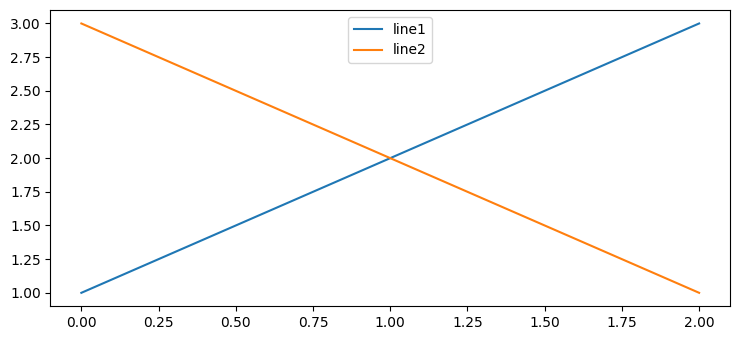

In [6]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot([1, 2, 3], label="line1")
line2, = plt.plot([3, 2, 1], label="line2")
leg = plt.legend(loc='upper center')
plt.show()

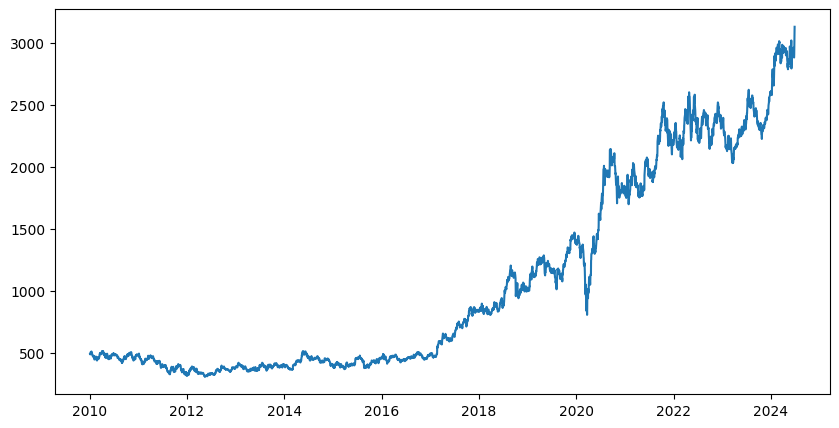

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Price')
plt.legend(loc='upper center')
plt.show()

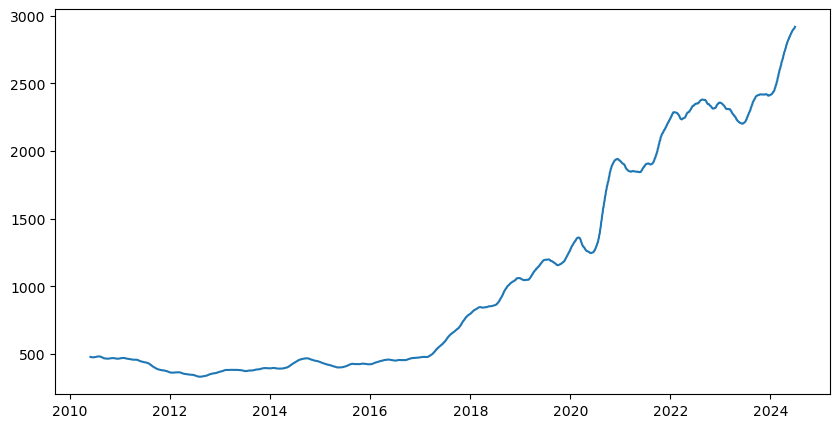

In [142]:
ma_100_days = df['Close'].rolling(100).mean()
fig = plt.figure(figsize=(10,5))
plt.plot(ma_100_days)

In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
df.shape

(3574, 6)

In [59]:
# Splitting the data into training and testing


data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])

In [60]:
print(data_training.shape)

(2501, 1)


In [61]:
print(data_testing.shape)

(1073, 1)


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [63]:
training_fitted = scaler.fit_transform(data_training)

In [64]:
x = []
y = []

for i in range(100, training_fitted.shape[0]):
    x.append(training_fitted[i-100:i])
    y.append(training_fitted[i][0])

In [65]:
x = np.array(x)
y = np.array(y)

In [66]:
x.shape

(2401, 100, 1)

#### Model

In [67]:
import keras
from keras.layers import LSTM

In [90]:
model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(x.shape[1],1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=1))

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [115]:
model.fit(x, y, epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - loss: 0.0050
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - loss: 0.0038
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - loss: 0.0037
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - loss: 0.0046
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - loss: 0.0035
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - loss: 0.0040
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 340ms/step - loss: 0.0034
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - loss: 0.0030
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 317ms/step - loss: 0.0032
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - loss: 0.0030
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - loss: 0.0041
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - loss: 0.0032
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - loss: 0.0031
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - loss: 0.0023
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [116]:
model.save('keras_model.keras')

In [117]:
loaded_model = keras.models.load_model('keras_model.keras')

In [118]:
data_testing

,Close
Date,
2020-02-26,1272.751099
2020-02-27,1267.493774
2020-02-28,1214.828125
2020-03-02,1203.399048
2020-03-03,1227.811646
...,...
2024-06-24,2882.949951
2024-06-25,2908.300049
2024-06-26,3028.050049


In [119]:
past_100_days = data_training.tail(100)

In [120]:
testing_data = pd.concat([past_100_days, data_testing], ignore_index=False)

In [121]:
testing_data_fitted = scaler.fit_transform(testing_data)

In [122]:
x_test = []
y_test = []

for i in range(100, testing_data_fitted.shape[0]):
    x_test.append(testing_data_fitted[i-100:i])
    y_test.append(testing_data_fitted[i][0])

In [123]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [124]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


In [125]:
y_test.shape

(1073,)

In [126]:
y_pred.shape

(1073, 1)

In [127]:
y_pred

array([[0.24234463],
       [0.24323739],
       [0.24299896],
       ...,
       [0.8357507 ],
       [0.8360064 ],
       [0.8376019 ]], dtype=float32)

In [128]:
y_predicted_transformed = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_transformed = scaler.inverse_transform(y_test.reshape(-1, 1))

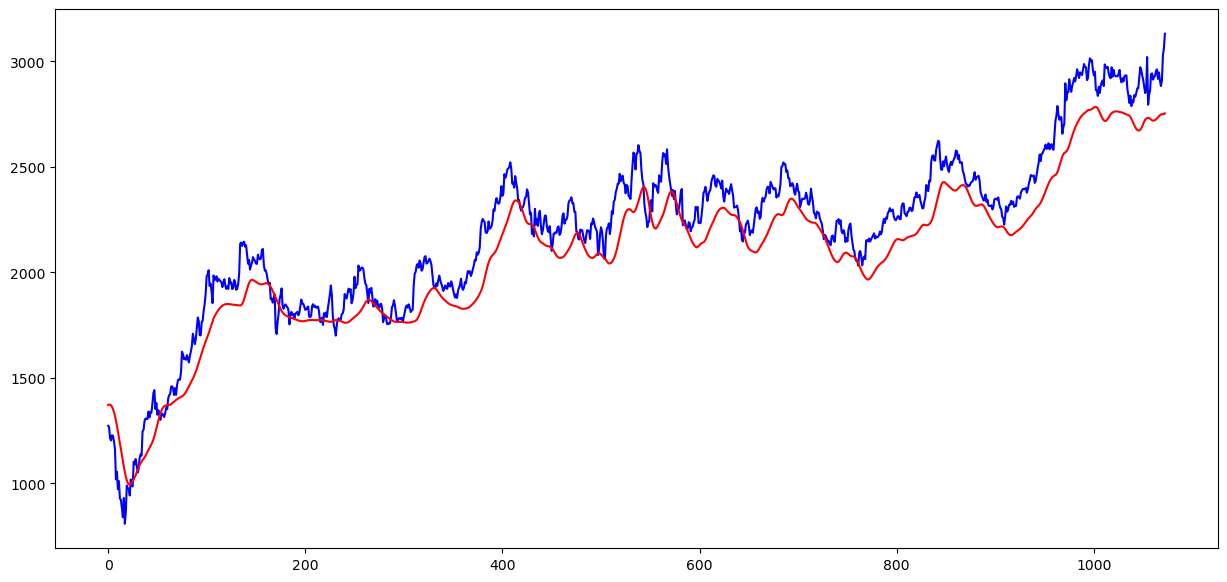

In [129]:
plt.figure(figsize=(15,7))

plt.plot(y_test_transformed, 'b-', label='Actual Value' )
plt.plot(y_predicted_transformed, 'r-', label='Predicted value')
plt.show()